In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.model_selection import cross_val_score, RandomizedSearchCV,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore")


In [ ]:
df= pd.read_csv(r"data\raw\survey.csv")

##  1- Data Exploration

In [3]:
df.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [4]:
df.shape

(1259, 27)

In [5]:
df.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [7]:
df.isnull().sum()

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

## 2- Data Cleaning

In [ ]:
df = df.drop(columns =['comments','Timestamp','state'],axis=1)

In [ ]:
#fill null values with mode
df['self_employed'].fillna(df['self_employed'].mode()[0],inplace= True)

In [10]:
df.groupby('treatment')['work_interfere'].apply(lambda x: x.isnull().value_counts())


treatment  No   
No         False    362
           True     260
Yes        False    633
           True       4
Name: work_interfere, dtype: int64

In [11]:
df.loc[df['work_interfere'].isnull() & (df['treatment'] == 'No'), 'work_interfere'] = 'Not Applicable'
df['work_interfere'] = df['work_interfere'].fillna(df['work_interfere'].mode()[0])

In [12]:
df['Gender']=df['Gender'].str.lower()
df['Gender']=df['Gender'].str.strip()

In [13]:
df['Gender'].unique()

array(['female', 'm', 'male', 'male-ish', 'maile', 'trans-female',
       'cis female', 'f', 'something kinda male?', 'cis male', 'woman',
       'mal', 'male (cis)', 'queer/she/they', 'non-binary', 'femake',
       'make', 'nah', 'all', 'enby', 'fluid', 'genderqueer', 'androgyne',
       'agender', 'cis-female/femme', 'guy (-ish) ^_^',
       'male leaning androgynous', 'man', 'trans woman', 'msle', 'neuter',
       'female (trans)', 'queer', 'female (cis)', 'mail',
       'a little about you', 'malr', 'p', 'femail', 'cis man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [14]:
def gender_cleaned (gender):

    male = ['male', 'man', 'm', 'mail', 'malr', 'cis male', 'cis man', 'male-ish','trans-female','Guy (-ish) ^_^',
        'something kinda male?','cis male','maile', 'mal', 'male (cis)', 'Make', 'male', 'man', 'msle', 'mail',
        'ostensibly male, unsure what that really means','neuter']
    female = ['female', 'woman', 'f', 'femake', 'cis female', 'cis woman','femail', 'female (cis)'
         ,'femake','female/woman']

    for g in gender :
        if g in male:
           return 'Male'
        elif g in female :
           return 'Female'
    return 'Male'

df['Gender']=df['Gender'].apply(gender_cleaned)

In [15]:
df['Gender'].value_counts()

Gender
Male      1012
Female     247
Name: count, dtype: int64

In [16]:
df['Age'].unique()

array([         37,          44,          32,          31,          33,
                35,          39,          42,          23,          29,
                36,          27,          46,          41,          34,
                30,          40,          38,          50,          24,
                18,          28,          26,          22,          19,
                25,          45,          21,         -29,          43,
                56,          60,          54,         329,          55,
       99999999999,          48,          20,          57,          58,
                47,          62,          51,          65,          49,
             -1726,           5,          53,          61,           8,
                11,          -1,          72], dtype=int64)

In [17]:
filt = (df['Age']>=18) & (df['Age']<=70)
df=df[filt]          

In [18]:
df['no_employees'].unique()

array(['6-25', 'More than 1000', '26-100', '100-500', '1-5', '500-1000'],
      dtype=object)

In [19]:
df.isnull().sum()

Age                          0
Gender                       0
Country                      0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
dtype: int64

## 3- Data Visuallization

Text(0.5, 1.0, 'Age Distribution')

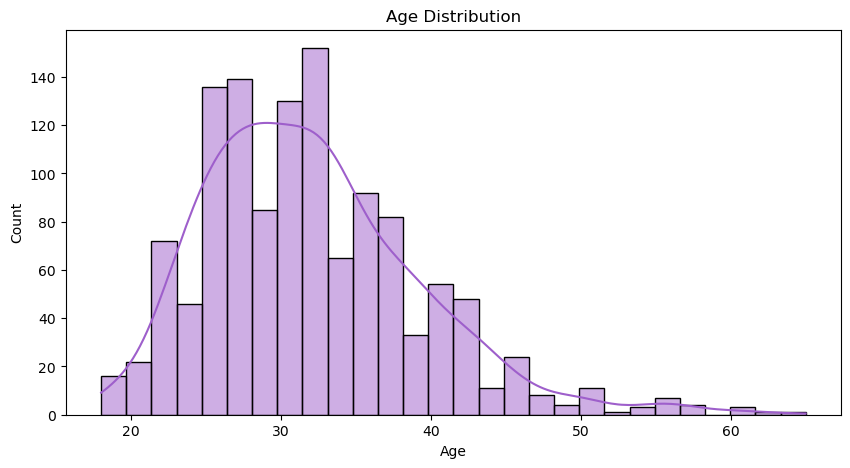

In [20]:
plt.figure(figsize=(10,5))
sns.histplot(df['Age'],kde=True,bins=28,color="#9E5FCB")
plt.title('Age Distribution')

Text(0.5, 1.0, 'Male vs Female')

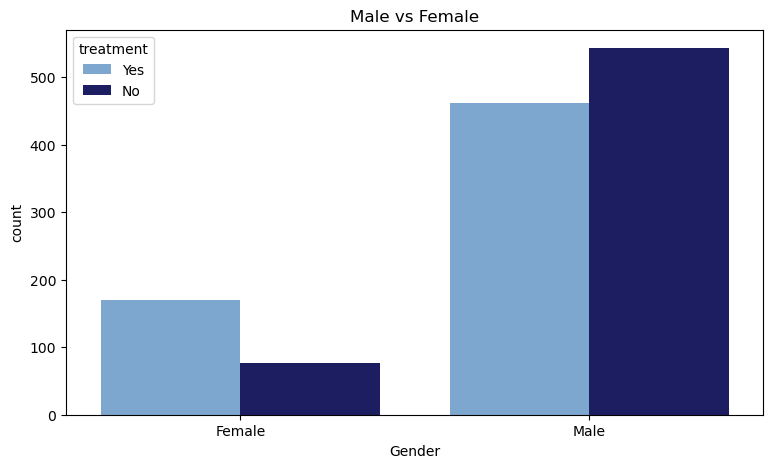

In [21]:
plt.figure(figsize=(9,5))
palette=["#6Fa8DC","#10136D"]
sns.countplot(x=df['Gender'],hue=df['treatment'],palette=palette)
plt.title('Male vs Female')

Text(0.5, 1.0, 'Treatment Distribution (Family History = No)')

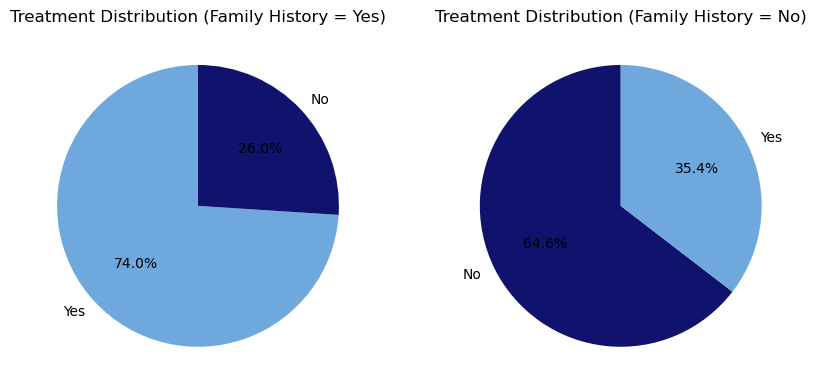

In [22]:
fig, ax = plt.subplots(1,2, figsize=(10,6))
palette1=["#10136D",'#6Fa8DC']
palette2 =['#6Fa8DC',"#10136D"]

counts_yes = df[df['family_history'] == 'Yes']['treatment'].value_counts()
ax[0].pie(counts_yes, labels=counts_yes.index, autopct='%1.1f%%', startangle=90,colors=palette2)
ax[0].set_title("Treatment Distribution (Family History = Yes)")

counts_no = df[df['family_history'] == 'No']['treatment'].value_counts()
ax[1].pie(counts_no, labels=counts_no.index, autopct='%1.1f%%', startangle=90,colors=palette1)
ax[1].set_title("Treatment Distribution (Family History = No)")

Text(0.5, 0, 'Availability of Family History with Mental Health Problems')

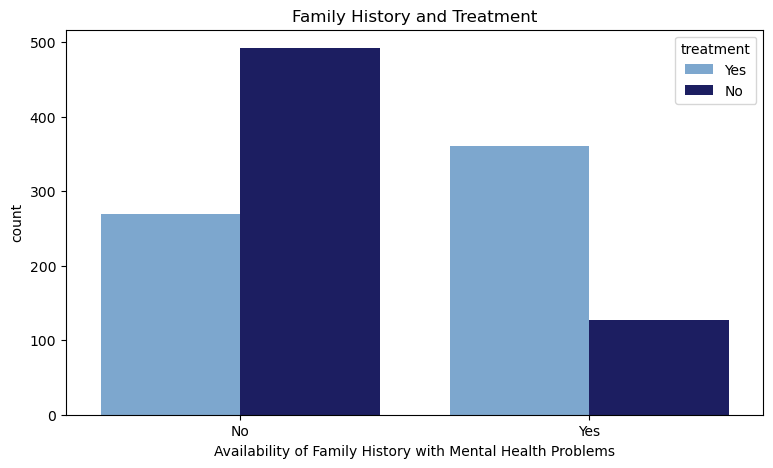

In [23]:
plt.figure(figsize=(9, 5))
sns.countplot(x=df['family_history'],hue=df['treatment'],palette=palette)
plt.title('Family History and Treatment')
plt.xlabel('Availability of Family History with Mental Health Problems')

Text(0.5, 0, ' Availability of Care Options')

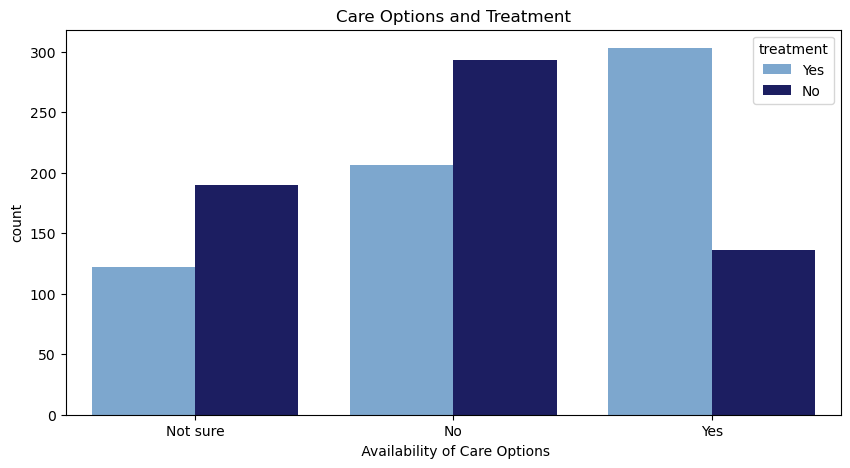

In [24]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['care_options'],hue=df['treatment'],palette=palette)
plt.title('Care Options and Treatment')
plt.xlabel(' Availability of Care Options')

Text(0.5, 0, 'Age Group')

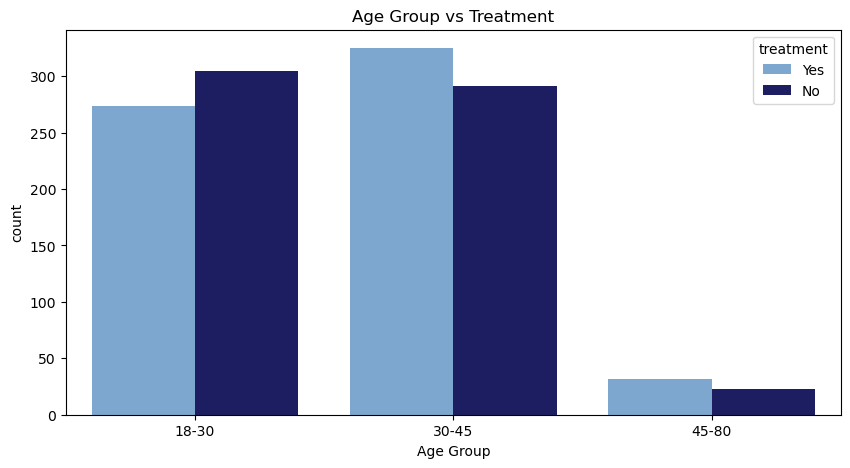

In [25]:
bins=[0,30,45,80]
labels =[('18-30'),('30-45') ,('45-80')]
df_copied=df.copy()
df_copied['age_group']=pd.cut(df_copied['Age'],bins=bins,labels=labels,include_lowest=True)
plt.figure(figsize=(10,5))
sns.countplot(x=df_copied['age_group'],hue=df_copied['treatment'],palette=palette)
plt.title('Age Group vs Treatment')
plt.xlabel('Age Group')

Text(0.5, 0, 'Work Interfere')

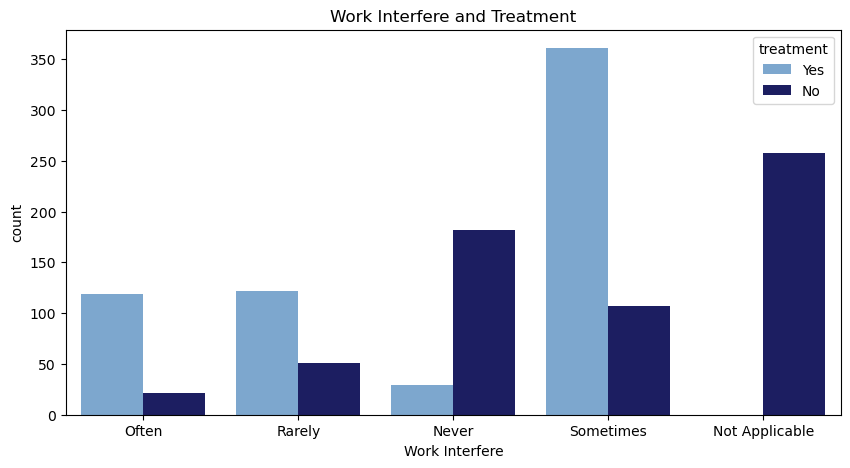

In [26]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['work_interfere'],hue=df['treatment'],palette=palette)
plt.title('Work Interfere and Treatment')
plt.xlabel('Work Interfere')

Text(0.5, 1.0, 'Top 10 Countries')

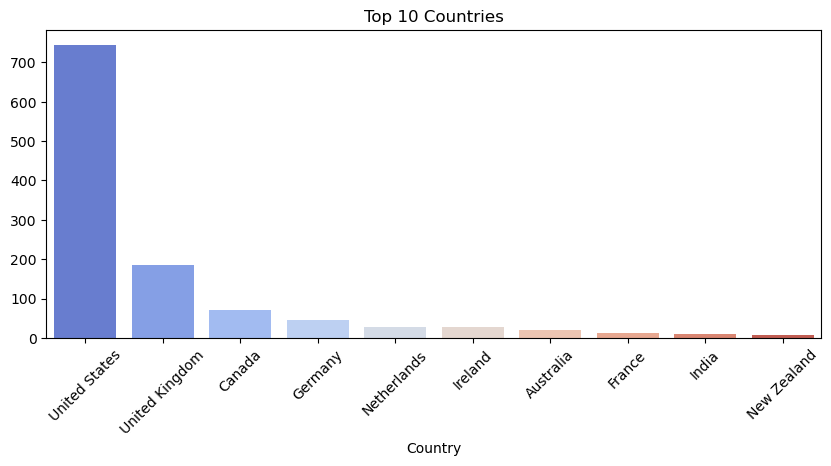

In [27]:
top_countries = df["Country"].value_counts().nlargest(10)
plt.figure(figsize=(10, 4))
sns.barplot(x=top_countries.index, y=top_countries.values, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Top 10 Countries")

## 4- Feature Engineering

In [28]:
country_counts = df['Country'].value_counts()

threshold = 100
countries_to_keep = country_counts[country_counts >= threshold].index
df['Country'] = df['Country'].apply(lambda x: x if x in countries_to_keep else 'Other')

print( df['Country'].value_counts())

Country
United States     745
Other             321
United Kingdom    184
Name: count, dtype: int64


In [29]:
ordinal_cols = ['work_interfere','no_employees','leave_order']
onehot_cols = ['Country','Gender', 'self_employed', 'family_history', 'remote_work', 
               'tech_company', 'benefits', 'care_options', 'wellness_program',
               'seek_help', 'anonymity', 'mental_health_consequence',
               'phys_health_consequence', 'coworkers', 'supervisor',
               'mental_health_interview', 'phys_health_interview',
               'mental_vs_physical', 'obs_consequence']

In [30]:
df_encoded=df.copy()

In [31]:
y = df_encoded['treatment'].map({'No': 0, 'Yes': 1})

In [32]:
work_interfere_order = ['Never', 'Rarely', 'Sometimes', 'Often', 'Not Applicable']
no_employees_order = ['1-5', '6-25', '26-100', '100-500', '500-1000', 'More than 1000']
leave_order = ['Very easy', 'Somewhat easy', "Don't know", 'Somewhat difficult', 'Very difficult']

cols_to_encode = ['work_interfere', 'no_employees', 'leave']

ord_enc = OrdinalEncoder(categories=[work_interfere_order, no_employees_order, leave_order])
df_encoded[cols_to_encode] = ord_enc.fit_transform(df_encoded[cols_to_encode])

In [33]:
ohe = OneHotEncoder(sparse_output=False, handle_unknown='ignore', drop='first')

df_onehot = ohe.fit_transform(df_encoded[onehot_cols])
onehot_feature_names = ohe.get_feature_names_out(onehot_cols)
df_encoded = df_encoded.drop(columns=onehot_cols)

for i, col_name in enumerate(onehot_feature_names):
    df_encoded[col_name] = df_onehot[:, i]


In [34]:
X = df_encoded.drop(columns=['treatment'])
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print(f"\nTrain set: {X_train.shape}, Test set: {X_test.shape}")


Train set: (1000, 36), Test set: (250, 36)


In [35]:
X_train.head()

,Age,work_interfere,no_employees,leave,Country_United Kingdom,Country_United States,Gender_Male,self_employed_Yes,family_history_Yes,remote_work_Yes,...,coworkers_Yes,supervisor_Some of them,supervisor_Yes,mental_health_interview_No,mental_health_interview_Yes,phys_health_interview_No,phys_health_interview_Yes,mental_vs_physical_No,mental_vs_physical_Yes,obs_consequence_Yes
981,37,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1048,41,3.0,0.0,4.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0
634,35,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
660,20,1.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
868,32,2.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## 5- Model Training and Evaluation 

In [36]:
model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv=4, scoring='recall')
print("recall per fold:", scores)
print("Mean recall:", scores.mean())

scores = cross_val_score(model, X_train, y_train, cv=4, scoring='f1')
print("\nf1 per fold:", scores)
print("Mean f1:", scores.mean())

scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')
print("\naccuracy per fold:", scores)
print("Mean accuracy: ", scores.mean())

recall per fold: [0.88188976 0.8968254  0.83333333 0.82539683]
Mean recall: 0.8593613298337708

f1 per fold: [0.84410646 0.85501859 0.83146067 0.78764479]
Mean f1: 0.8295576282602533

accuracy per fold: [0.832 0.832 0.804 0.796]
Mean accuracy:  0.8160000000000001


In [39]:
param_grid = {
    'n_estimators': [100,120,150],
    'max_depth': [None, 10, 20,30],
    'min_samples_split': [7,9,12],
    'class_weight': ['balanced']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(
    rf,
    param_grid,
    cv=4,
    scoring='recall',   
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

print("Best Recall:", grid_search.best_score_)
print("Best Params:", grid_search.best_params_)


Best Recall: 0.904949381327334
Best Params: {'class_weight': 'balanced', 'max_depth': None, 'min_samples_split': 12, 'n_estimators': 150}


In [40]:
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)
print("classification report:\n")
print(classification_report(y_test, y_pred))

classification report:

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       124
           1       0.79      0.88      0.83       126

    accuracy                           0.82       250
   macro avg       0.82      0.82      0.82       250
weighted avg       0.82      0.82      0.82       250



Text(0.5, 1.0, 'Confusion Matrix for Random Forest')

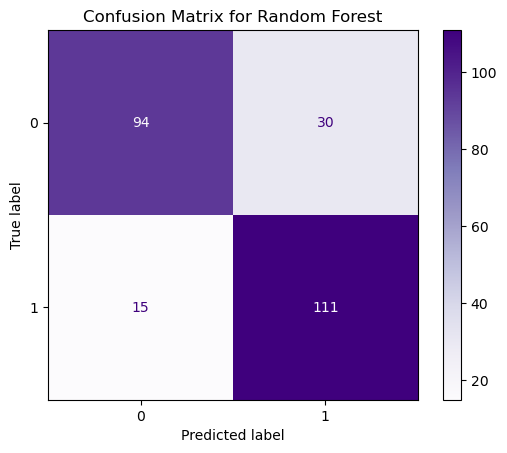

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,cmap="Purples")
plt.title("Confusion Matrix for Random Forest")


In [42]:
model = GradientBoostingClassifier(random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=4, scoring='recall')
print("recall per fold:", scores)
print("Mean recall: \n", scores.mean())

scores = cross_val_score(model, X_train, y_train, cv=4, scoring='f1')
print("\nf1 per fold:", scores)
print("Mean f1: ", scores.mean())

scores = cross_val_score(model, X_train, y_train, cv=4, scoring='accuracy')
print("\naccuracy per fold:", scores)
print("Mean accuracy:", scores.mean())

recall per fold: [0.86614173 0.92857143 0.84920635 0.86507937]
Mean recall: 
 0.8772497187851519

f1 per fold: [0.84291188 0.86029412 0.80451128 0.8164794 ]
Mean f1:  0.8310491684965617

accuracy per fold: [0.836 0.848 0.792 0.804]
Mean accuracy: 0.8200000000000001


In [ ]:
param_dist = {
    'n_estimators': [100, 200, 400],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 6],
    'subsample': [0.6, 0.8, 1.0],
    'min_samples_split': [2, 5, 10]
}

rs = RandomizedSearchCV(
    estimator=GradientBoostingClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=50,               
    scoring='recall',        
    cv=4,
    n_jobs=-1,
    random_state=42,
    verbose=1
)

rs.fit(X_train, y_train)

print("Best params:", rs.best_params_)
print("Best CV recall (validation):", np.round(rs.best_score_, 4))


Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best params: {'subsample': 0.6, 'n_estimators': 100, 'min_samples_split': 5, 'max_depth': 3, 'learning_rate': 0.01}
Best CV recall (validation): 0.9564


In [44]:
best_gb = rs.best_estimator_
best_gb.fit(X_train, y_train)
y_pred = best_gb.predict(X_test)

print("classification report:")
print(classification_report(y_test, y_pred))

classification report:
              precision    recall  f1-score   support

           0       0.93      0.73      0.81       124
           1       0.78      0.94      0.85       126

    accuracy                           0.84       250
   macro avg       0.85      0.84      0.83       250
weighted avg       0.85      0.84      0.83       250



Text(0.5, 1.0, 'Confusion Matrix for Gradient Boosting')

<Figure size 600x500 with 0 Axes>

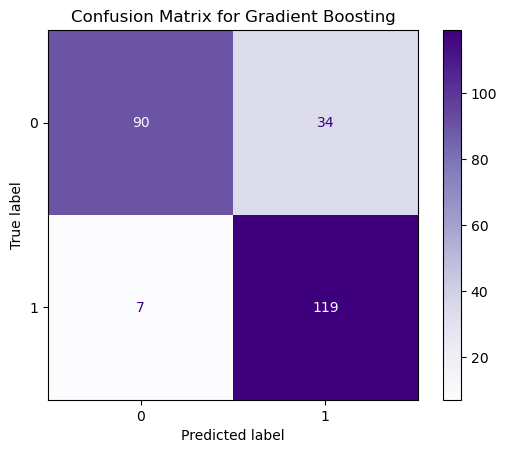

In [45]:
plt.figure(figsize=(6,5))
disp = ConfusionMatrixDisplay.from_predictions(
    y_test,
    y_pred,
    cmap='Purples',   
    values_format='d'
)
plt.title("Confusion Matrix for Gradient Boosting")
